In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = np.size(y_train)

# TODO: Number of validation examples
n_validation = np.size(y_valid)

# TODO: Number of testing examples.
n_test = np.size(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation) #added
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
import csv

labels = None
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    labels = {int(rows[0]):rows[1] for rows in reader}

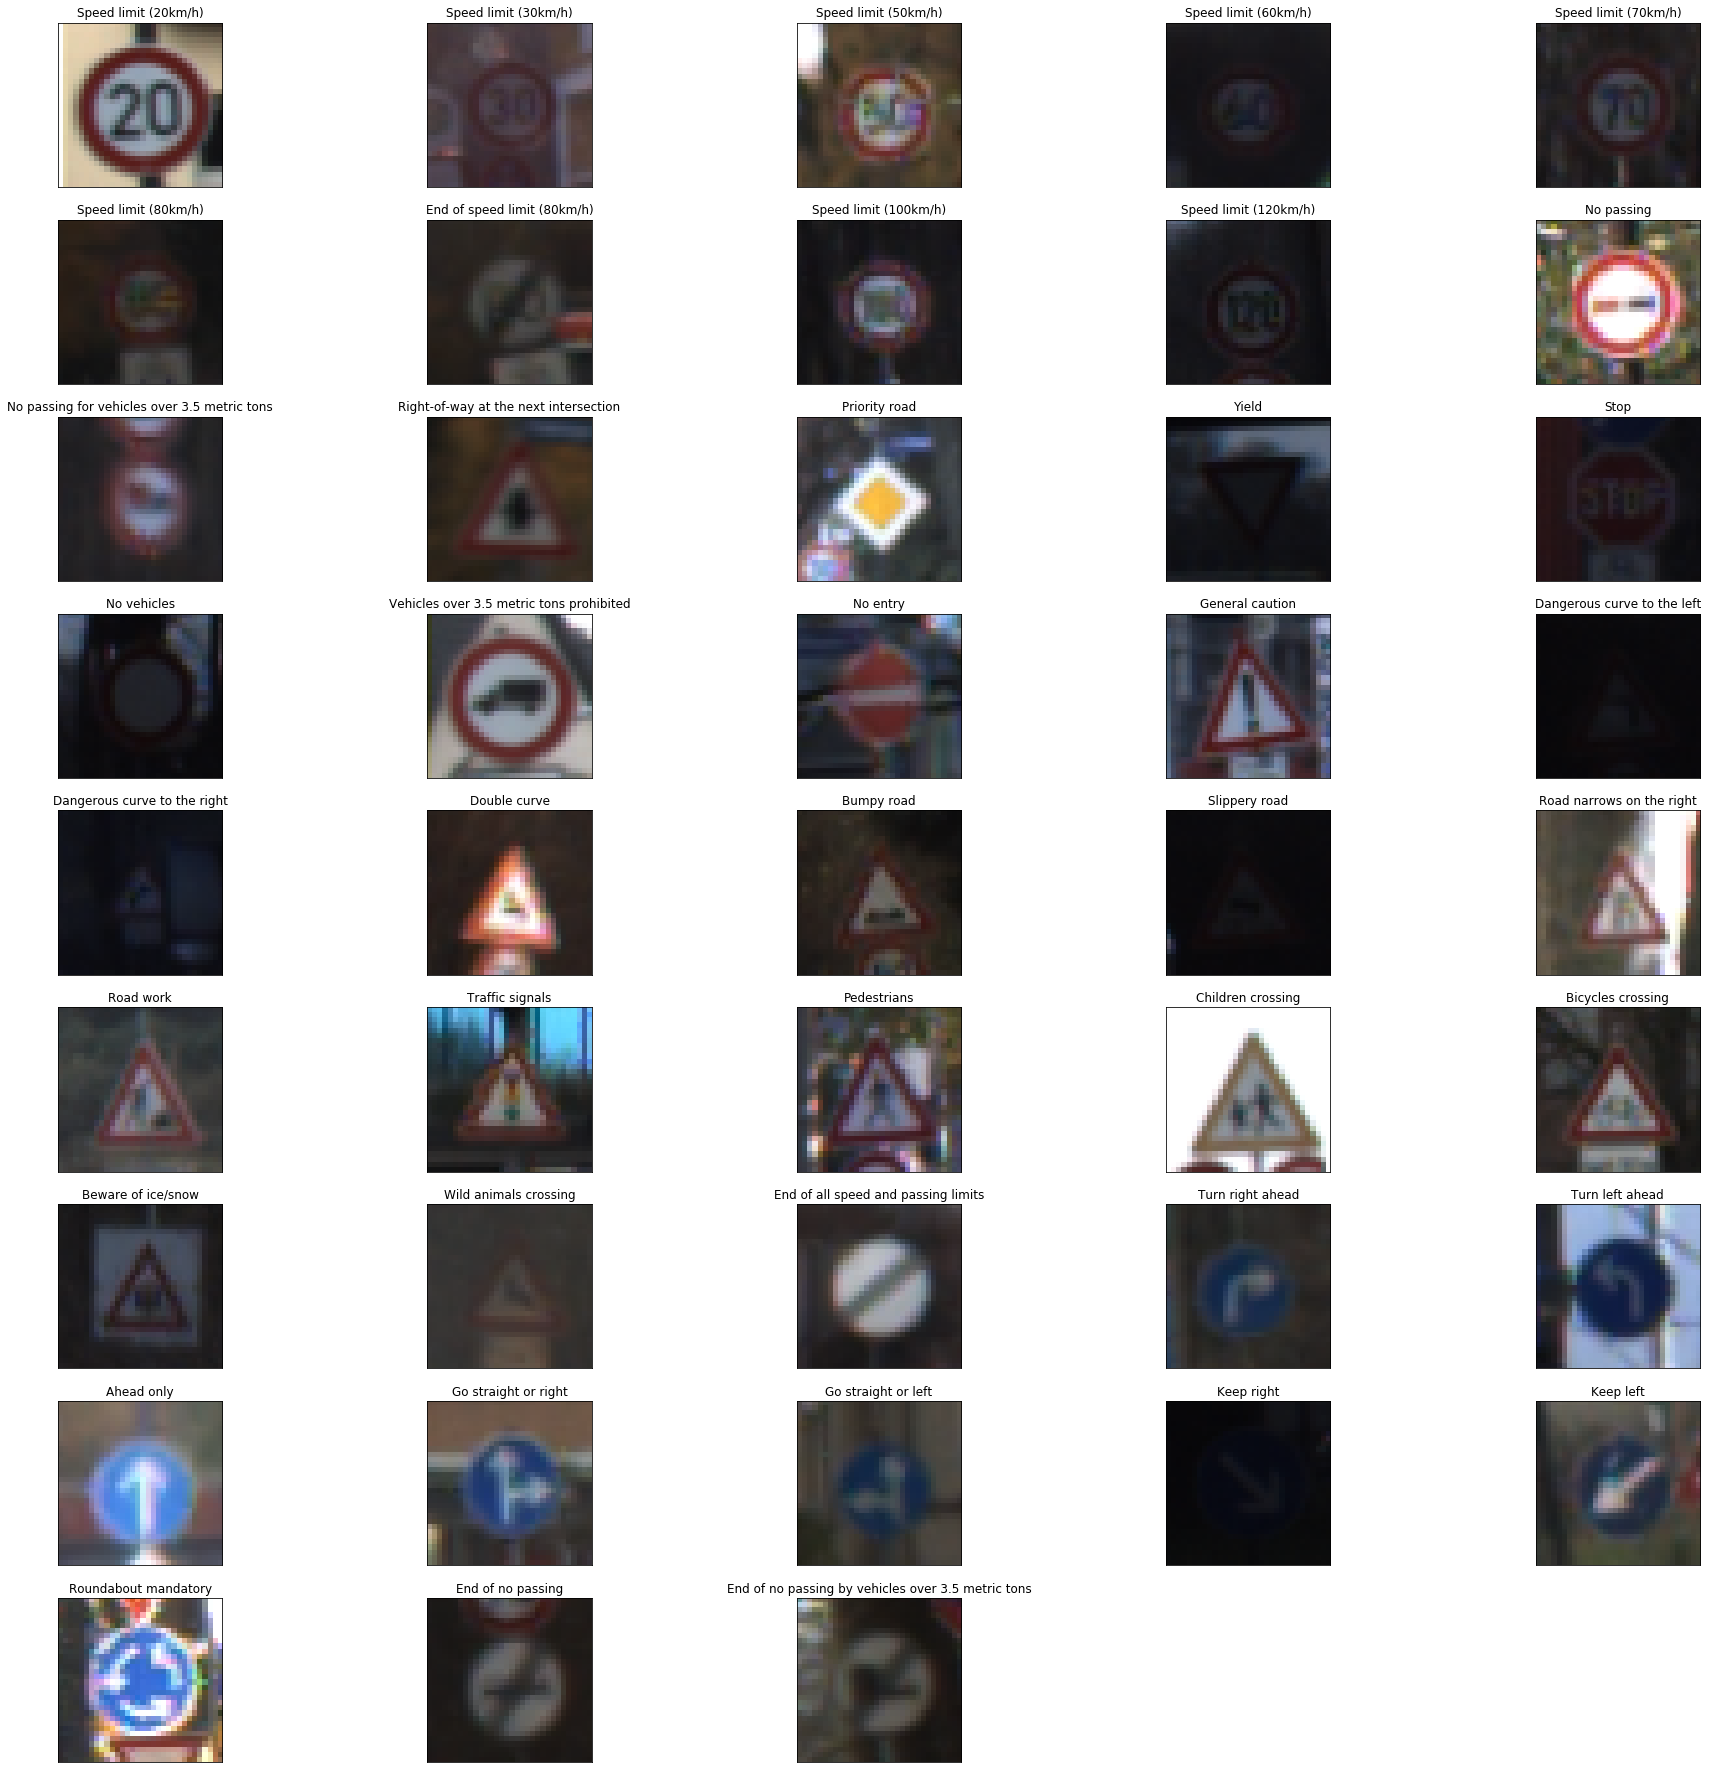

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

### Visualizing Data for Each Label
fig = plt.figure(figsize=(32,32))
for i in range(n_classes):
    k = np.where(y_train==i)
    img = X_train[k[0][0]]
    ax = fig.add_subplot(int(n_classes/5)+1,5,i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(img, interpolation='none')
    ax.set_title(labels[y_train[k[0][0]]])
plt.show()

0. Speed limit (20km/h) - Samples: 180


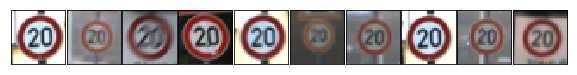

1. Speed limit (30km/h) - Samples: 1980


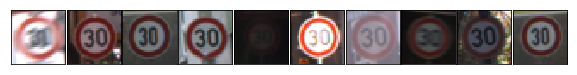

2. Speed limit (50km/h) - Samples: 2010


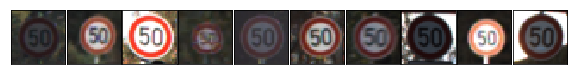

3. Speed limit (60km/h) - Samples: 1260


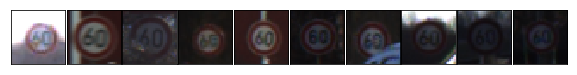

4. Speed limit (70km/h) - Samples: 1770


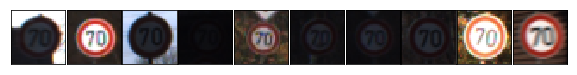

5. Speed limit (80km/h) - Samples: 1650


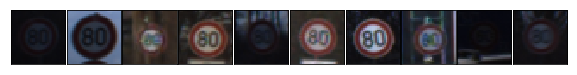

6. End of speed limit (80km/h) - Samples: 360


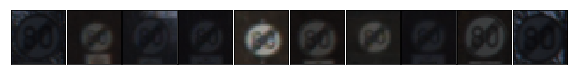

7. Speed limit (100km/h) - Samples: 1290


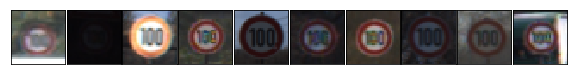

8. Speed limit (120km/h) - Samples: 1260


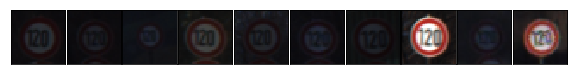

9. No passing - Samples: 1320


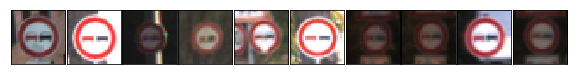

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


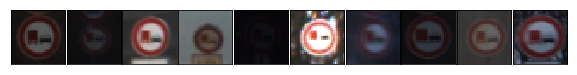

11. Right-of-way at the next intersection - Samples: 1170


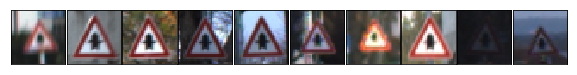

12. Priority road - Samples: 1890


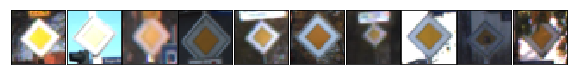

13. Yield - Samples: 1920


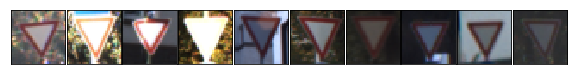

14. Stop - Samples: 690


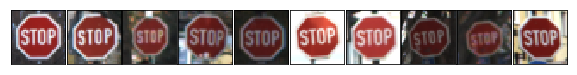

15. No vehicles - Samples: 540


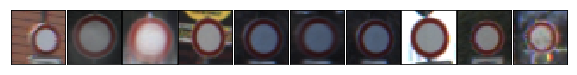

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


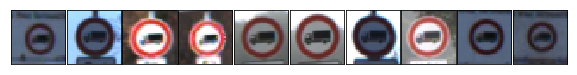

17. No entry - Samples: 990


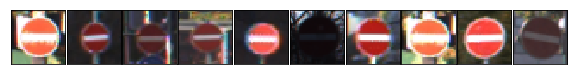

18. General caution - Samples: 1080


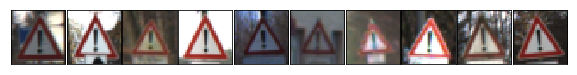

19. Dangerous curve to the left - Samples: 180


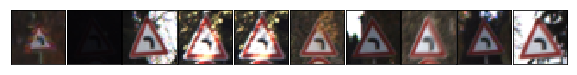

20. Dangerous curve to the right - Samples: 300


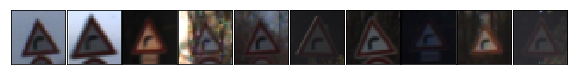

21. Double curve - Samples: 270


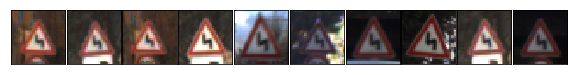

22. Bumpy road - Samples: 330


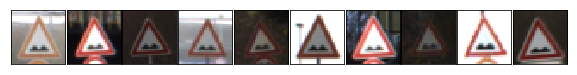

23. Slippery road - Samples: 450


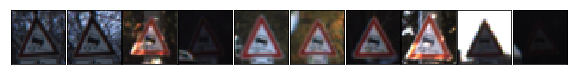

24. Road narrows on the right - Samples: 240


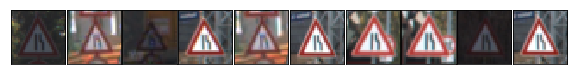

25. Road work - Samples: 1350


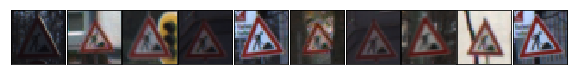

26. Traffic signals - Samples: 540


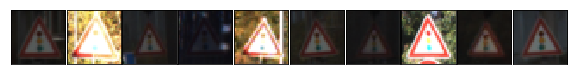

27. Pedestrians - Samples: 210


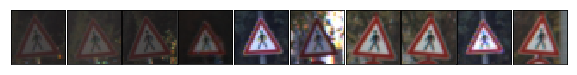

28. Children crossing - Samples: 480


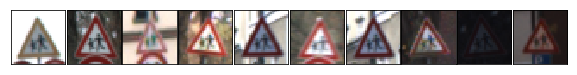

29. Bicycles crossing - Samples: 240


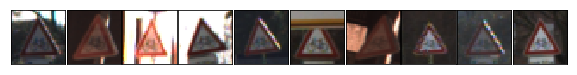

30. Beware of ice/snow - Samples: 390


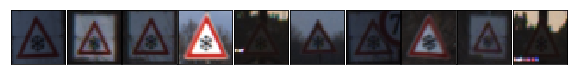

31. Wild animals crossing - Samples: 690


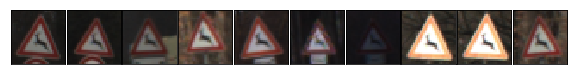

32. End of all speed and passing limits - Samples: 210


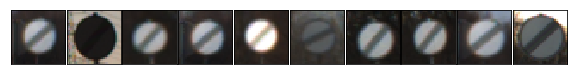

33. Turn right ahead - Samples: 599


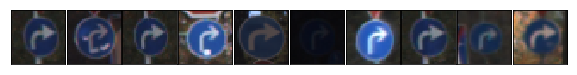

34. Turn left ahead - Samples: 360


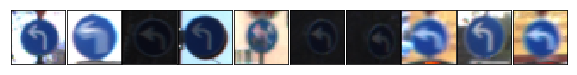

35. Ahead only - Samples: 1080


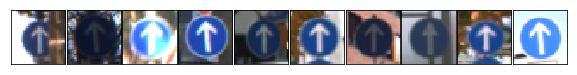

36. Go straight or right - Samples: 330


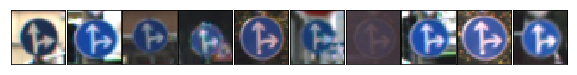

37. Go straight or left - Samples: 180


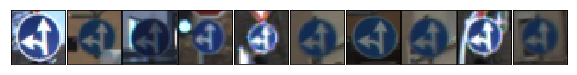

38. Keep right - Samples: 1860


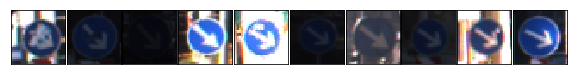

39. Keep left - Samples: 270


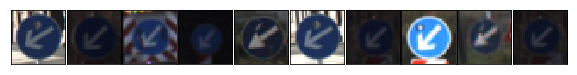

40. Roundabout mandatory - Samples: 300


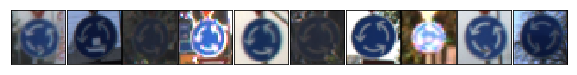

41. End of no passing - Samples: 210


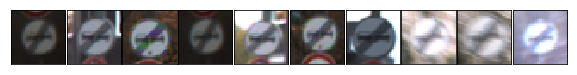

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


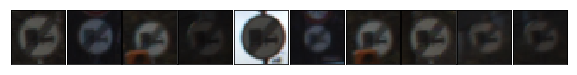

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

ind = np.arange(n_classes)

hist_train, bins = np.histogram( y_train, n_classes)

samples_per_sign = 10
for i in range(n_classes):
    print("{0}. {1} - Samples: {2}".format(i, labels[i], hist_train[i]))
    sample_indices = np.where(y_train==i)[0]
    random_samples = random.sample(list(sample_indices), samples_per_sign)
    fig = plt.figure(figsize = (samples_per_sign, 1))
    fig.subplots_adjust(hspace = 0, wspace = 0)
    for i in range(samples_per_sign):
        image = X_train[random_samples[i]]
        ax = fig.add_subplot(1,samples_per_sign, i+1, xticks=[], yticks=[])
        ax.imshow(image.squeeze())
    plt.show()

0. Speed limit (20km/h) - Samples: 180


/Users/cherylestacio/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


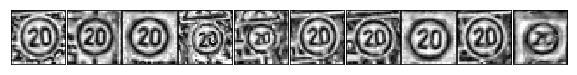

1. Speed limit (30km/h) - Samples: 1980


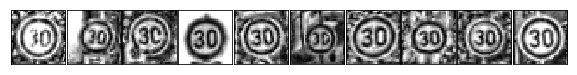

2. Speed limit (50km/h) - Samples: 2010


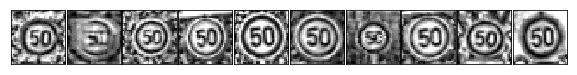

3. Speed limit (60km/h) - Samples: 1260


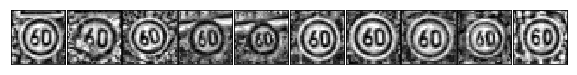

4. Speed limit (70km/h) - Samples: 1770


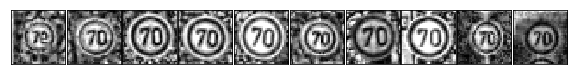

5. Speed limit (80km/h) - Samples: 1650


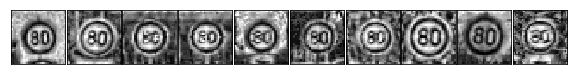

6. End of speed limit (80km/h) - Samples: 360


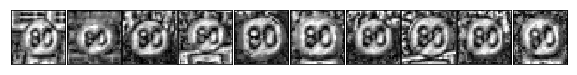

7. Speed limit (100km/h) - Samples: 1290


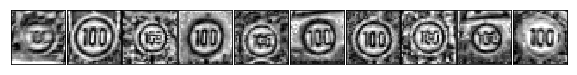

8. Speed limit (120km/h) - Samples: 1260


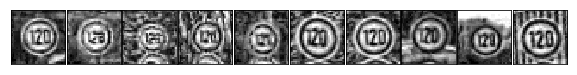

9. No passing - Samples: 1320


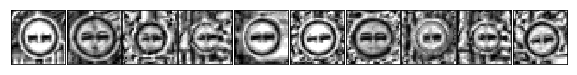

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


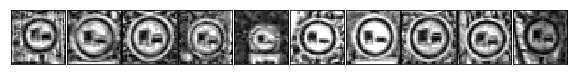

11. Right-of-way at the next intersection - Samples: 1170


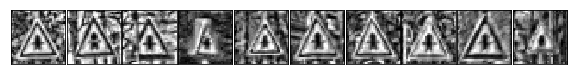

12. Priority road - Samples: 1890


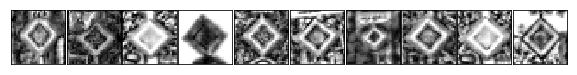

13. Yield - Samples: 1920


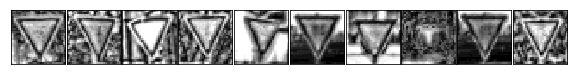

14. Stop - Samples: 690


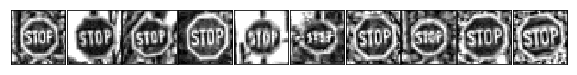

15. No vehicles - Samples: 540


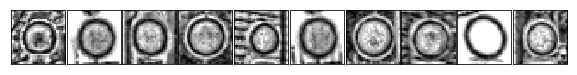

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


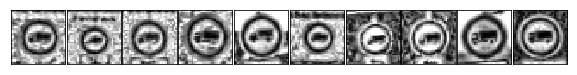

17. No entry - Samples: 990


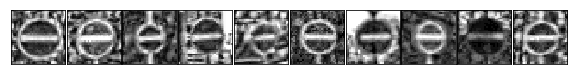

18. General caution - Samples: 1080


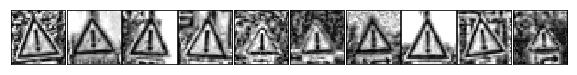

19. Dangerous curve to the left - Samples: 180


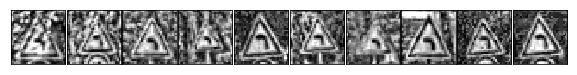

20. Dangerous curve to the right - Samples: 300


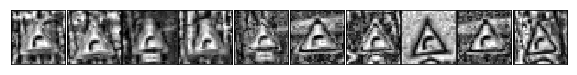

21. Double curve - Samples: 270


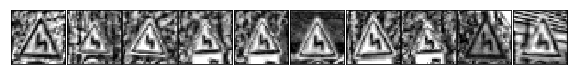

22. Bumpy road - Samples: 330


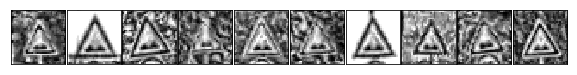

23. Slippery road - Samples: 450


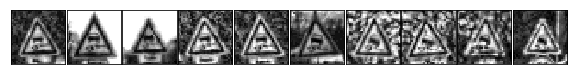

24. Road narrows on the right - Samples: 240


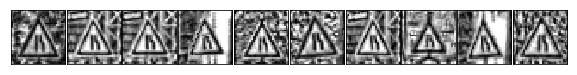

25. Road work - Samples: 1350


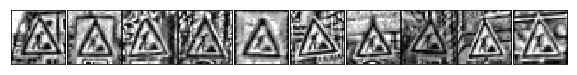

26. Traffic signals - Samples: 540


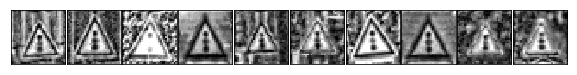

27. Pedestrians - Samples: 210


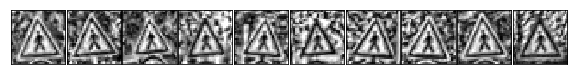

28. Children crossing - Samples: 480


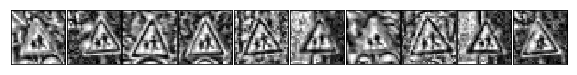

29. Bicycles crossing - Samples: 240


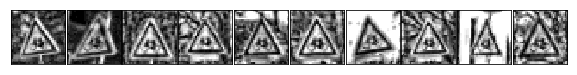

30. Beware of ice/snow - Samples: 390


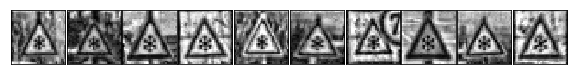

31. Wild animals crossing - Samples: 690


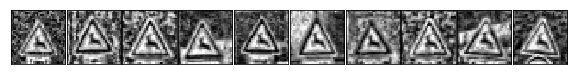

32. End of all speed and passing limits - Samples: 210


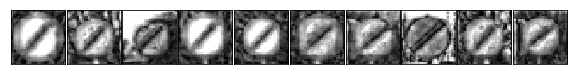

33. Turn right ahead - Samples: 599


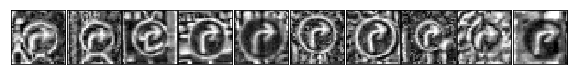

34. Turn left ahead - Samples: 360


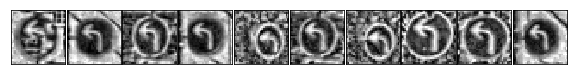

35. Ahead only - Samples: 1080


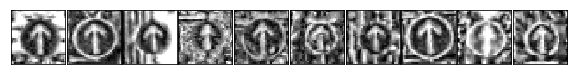

36. Go straight or right - Samples: 330


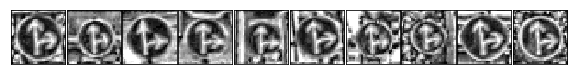

37. Go straight or left - Samples: 180


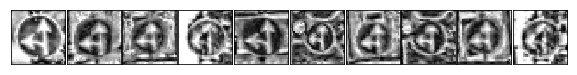

38. Keep right - Samples: 1860


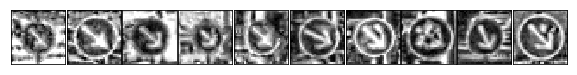

39. Keep left - Samples: 270


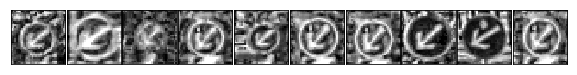

40. Roundabout mandatory - Samples: 300


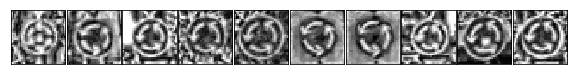

41. End of no passing - Samples: 210


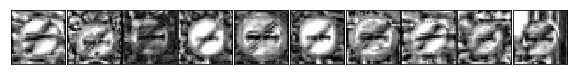

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


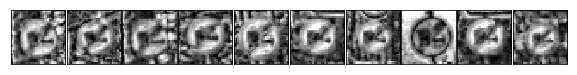

In [8]:
def normalize(img):
    #data[0]
    #print(data.shape)
    
    row = img.shape[0]
    col = img.shape[1]
    ch = img.shape[2]  
 
    img = color.rgb2gray(img)
    img_rescale = exposure.equalize_adapthist(img, clip_limit=0.03)

    return img_rescale.reshape( row, col, 1)

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

ind = np.arange(n_classes)

hist_train, bins = np.histogram( y_train, n_classes)

samples_per_sign = 10
for i in range(n_classes):
    print("{0}. {1} - Samples: {2}".format(i, labels[i], hist_train[i]))
    sample_indices = np.where(y_train==i)[0]
    random_samples = random.sample(list(sample_indices), samples_per_sign)
    fig = plt.figure(figsize = (samples_per_sign, 1))
    fig.subplots_adjust(hspace = 0, wspace = 0)
    for i in range(samples_per_sign):
        image = X_train[random_samples[i]]
        image = normalize(image)
        ax = fig.add_subplot(1,samples_per_sign, i+1, xticks=[], yticks=[])
        ax.imshow(image.squeeze(), cmap='gray')
    plt.show()

In [ ]:
### Count of each class in train and validation set
ind = np.arange(n_classes)

hist_train, bins = np.histogram( y_train, n_classes)

fig, ax = plt.subplots()
#set_train = ax.hist(lab_train, ind)
set_train = ax.barh(ind, hist_train)

# add some text for labels, title and axes ticks
ax.set_xlabel('Counts')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(ind)
ax.set_yticklabels(labels.values())
ax.set_title('Training Set\nCounts for each Traffic Sign')

fig.set_figheight(30)
fig.set_figwidth(20)

plt.show()


/Users/cherylestacio/anaconda/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


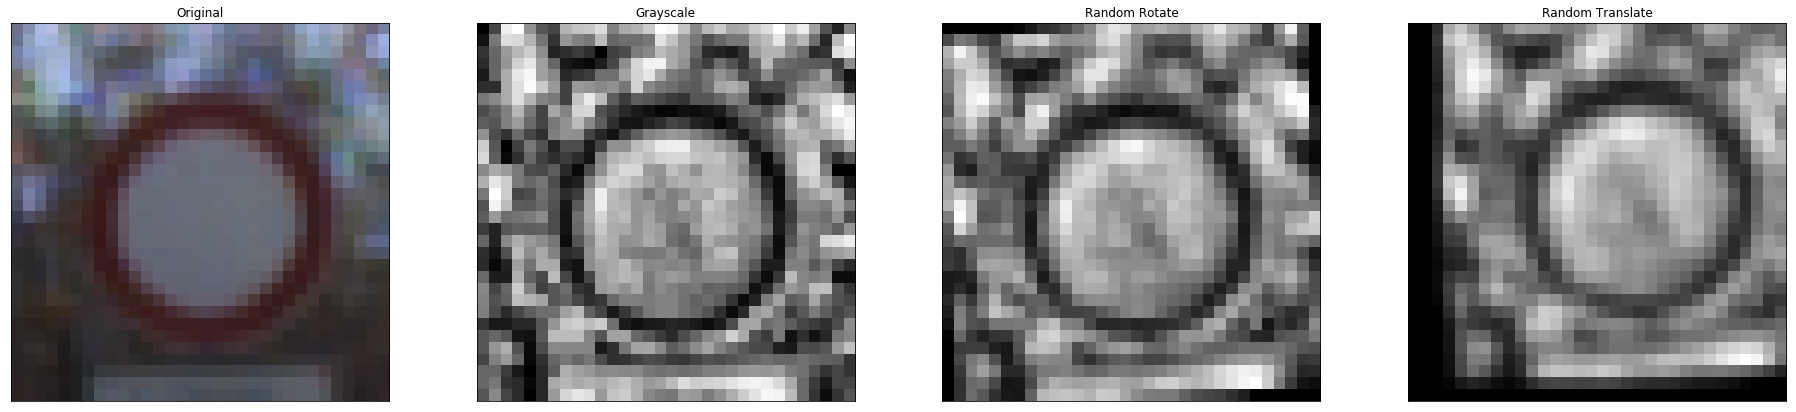

In [7]:
import numpy as np
import cv2
from sklearn.utils import shuffle
from skimage import data, img_as_float
from skimage import exposure, color

def image_translate(img):
    row = img.shape[0]
    col = img.shape[1]
    ch = img.shape[2]    
    
    x = img.shape[0]
    y = img.shape[1]   
    x_shift = np.random.uniform(-0.1 * x, 0.1 * x)
    y_shift = np.random.uniform(-0.1 * y, 0.1 * y)

    shift_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    shift_img = cv2.warpAffine(img, shift_matrix, (x, y))
    return shift_img.reshape( row, col, ch)


def image_rotate(img):
    row = img.shape[0]
    col = img.shape[1]
    ch = img.shape[2]

    angle = np.random.uniform(-10, 10)
    rotation_point = (row / 2, col / 2)
    rotation_matrix = cv2.getRotationMatrix2D(rotation_point, angle, 1)
    #print(rotation_matrix)

    rotated_img = cv2.warpAffine(img, rotation_matrix, (col, row))
    return rotated_img.reshape( row, col, ch)


def normalize(img):
    #data[0]
    #print(data.shape)
    
    row = img.shape[0]
    col = img.shape[1]
    ch = img.shape[2]  
 
    img = color.rgb2gray(img)
    img_rescale = exposure.equalize_adapthist(img, clip_limit=0.03)

    return img_rescale.reshape( row, col, 1)


img = X_train[30015]
image_shape = img.shape
#print(image_shape)

gray_img = normalize(img) 
temp_img2 = image_rotate(gray_img)
temp_img3 = image_translate(temp_img2)


### Visualizing Data for Each Label
fig = plt.figure(figsize=(32,32))

ax = fig.add_subplot(4,4,1)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.imshow(img, interpolation='none')
ax.set_title('Original')

ax = fig.add_subplot(4,4,2)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.imshow(gray_img.squeeze(), interpolation='none', cmap='gray')
ax.set_title('Grayscale')

ax = fig.add_subplot(4,4,3)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.imshow(temp_img2.squeeze(), interpolation='none', cmap='gray')
ax.set_title('Random Rotate')

ax = fig.add_subplot(4,4,4)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.imshow(temp_img3.squeeze(), interpolation='none', cmap='gray')
ax.set_title('Random Translate')


plt.show()